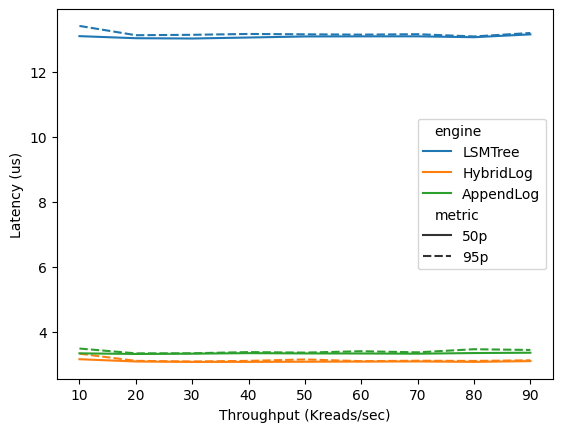


\begin{figure}[H]
    \centering
    \includegraphics[width=0.6\textwidth]{read-throughput.png}
    \caption{read-throughput}
    \label{fig:read-throughput}
\end{figure}



In [8]:
import sys
sys.path.append('..')
from utils import *
from distributions import Uniform, Zipfian, HotSet
from kevo import LSMTree, AppendLog, HybridLog, MemOnly, PathReplica


def measure_throughput_latency_reads(db, distro, keys_set, vals_set, n_ops, engine, eng_comb, **args):
    res = []

    seconds = 10
    reads_per_secs = list(range(10_000, 100_000, 10_000))

    # first populate
    for k, v in zip(keys_set, vals_set):
        db[k] = v

    for reads_per_sec in reads_per_secs:
        latencies = []
        for i in range(seconds):
            with Timer() as latency:
                for _ in range(reads_per_sec):
                    _ = db[keys_set[next(distro)]]
            latency = float(latency)
            avg_latency = latency / reads_per_sec
            # if latency < 1:
            #     sleep(1 - latency)
            latencies.append(avg_latency)

        res.append({'metric': '50p', 'value': percentile(latencies, 50), 'reads_per_sec': reads_per_sec/1000})
        res.append({'metric': '95p', 'value': percentile(latencies, 95), 'reads_per_sec': reads_per_sec/1000})

    return res

df = run(
    [5], [5], [100_000], [0],
    [Uniform], [{'seed': [1]}],
    [LSMTree, HybridLog, AppendLog], [{
        'max_runs_per_level': [10],
        'density_factor': [10],
        'memtable_bytes_limit': [100_000],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'mem_segment_len': [21_000],
        'ro_lag_interval': [10_000],
        'flush_interval': [10_000],
        'hash_index': ['dict'],
        'compaction_enabled': [False],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'threshold': [100_000],
        'replica': [None]
    }],
    [measure_throughput_latency_reads], {}
)
data = df[['reads_per_sec', 'metric', 'value', 'engine']]
data = data[data['metric'].isin(['50p', '95p'])]
data['value'] = data['value'] * 1000000

lineplot(data, 'reads_per_sec', 'value', 'read-throughput',
         hue='engine',
         style='metric',
         X='Throughput (Kreads/sec)', Y='Latency (us)',
         save=True, show=True)


#5,5,100k,lookparams,10sec

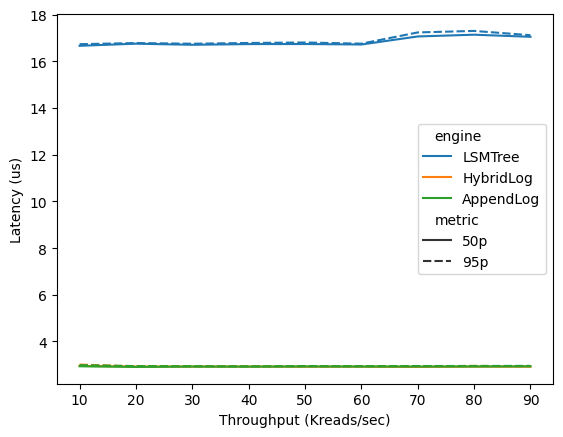


\begin{figure}[H]
    \centering
    \includegraphics[width=0.6\textwidth]{read-throughput-zipf.png}
    \caption{read-throughput-zipf}
    \label{fig:read-throughput-zipf}
\end{figure}



In [7]:
import sys
sys.path.append('..')
from utils import *
from distributions import Uniform, Zipfian, HotSet
from kevo import LSMTree, AppendLog, HybridLog, MemOnly, PathReplica


def measure_throughput_latency_reads(db, distro, keys_set, vals_set, n_ops, engine, eng_comb, **args):
    res = []

    seconds = 10
    reads_per_secs = list(range(10_000, 100_000, 10_000))

    # first populate
    for k, v in zip(keys_set, vals_set):
        db[k] = v

    for reads_per_sec in reads_per_secs:
        latencies = []
        for i in range(seconds):
            with Timer() as latency:
                for _ in range(reads_per_sec):
                    _ = db[keys_set[next(distro)]]
            latency = float(latency)
            avg_latency = latency / reads_per_sec
            # if latency < 1:
            #     sleep(1 - latency)
            latencies.append(avg_latency)

        res.append({'metric': '50p', 'value': percentile(latencies, 50), 'reads_per_sec': reads_per_sec/1000})
        res.append({'metric': '95p', 'value': percentile(latencies, 95), 'reads_per_sec': reads_per_sec/1000})

    return res

df = run(
    [5], [5], [100_000], [0],
    [Zipfian], [{'seed': [2]}],
    [LSMTree, HybridLog, AppendLog], [{
        'max_runs_per_level': [10],
        'density_factor': [10],
        'memtable_bytes_limit': [100_000],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'mem_segment_len': [21_000],
        'ro_lag_interval': [10_000],
        'flush_interval': [10_000],
        'hash_index': ['dict'],
        'compaction_enabled': [False],
        'replica': [None]
    },
    {
        'max_runs_per_level': [10],
        'threshold': [100_000],
        'replica': [None]
    }],
    [measure_throughput_latency_reads], {}
)
data = df[['reads_per_sec', 'metric', 'value', 'engine']]
data = data[data['metric'].isin(['50p', '95p'])]
data['value'] = data['value'] * 1000000

lineplot(data, 'reads_per_sec', 'value', 'read-throughput-zipf',
         hue='engine',
         style='metric',
         X='Throughput (Kreads/sec)', Y='Latency (us)',
         save=False, show=True)


#5,5,100k,lookparams,10sec